In [2]:
import cv2
import numpy as np
img=cv2.imread("wyb.jpg")
grayImage=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 #Roberts算子
kernelx=np.array([[-1,0],[0,1]], dtype=int)
kernely=np.array([[0, -1],[1, 0]], dtype=int)
x=cv2.filter2D(grayImage,cv2.CV_16S, kernelx)
y=cv2.filter2D(grayImage,cv2.CV_16S, kernely)
  #转uint8 
absX=cv2.convertScaleAbs(x)
absY=cv2.convertScaleAbs(y)
Roberts=cv2.addWeighted(absX,0.5, absY,0.5,0)
cv2.imshow('Original Image', img)
cv2.imshow('Roberts Operator', Roberts)

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

# 选取一副图像，首先对图像进行高斯滤波处理和阈值化处理之后，再进行边缘检测，对比常见的Roberts算子，Prewitt算子，Sobel算子和Laplacian算子的图像锐化操作。

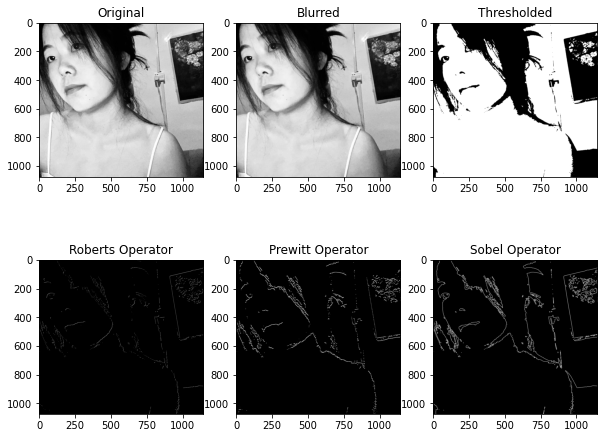

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('khl.jpg', cv2.IMREAD_GRAYSCALE)


#高斯滤波
blurred = cv2.GaussianBlur(image, (5, 5), 0)
_, thresholded = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY)

#边缘检测
roberts = cv2.filter2D(thresholded, -1, np.array([[1, 0], [0, -1]]))
prewitt = cv2.filter2D(thresholded, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
sobel_x = cv2.Sobel(thresholded, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(thresholded, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(sobel_x**2 + sobel_y**2)
laplacian = cv2.Laplacian(thresholded, cv2.CV_64F)

#
plt.figure(figsize=(10, 8))

plt.subplot(231), plt.imshow(image, cmap='gray'), plt.title('Original')
plt.subplot(232), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(233), plt.imshow(thresholded, cmap='gray'), plt.title('Thresholded')
plt.subplot(234), plt.imshow(roberts, cmap='gray'), plt.title('Roberts Operator')
plt.subplot(235), plt.imshow(prewitt, cmap='gray'), plt.title('Prewitt Operator')
plt.subplot(236), plt.imshow(sobel, cmap='gray'), plt.title('Sobel Operator')

plt.show()

